In [18]:
import numpy as np
import re
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from requests import get
import unicodedata
from bs4 import BeautifulSoup
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
import sys
reload(sys)
sys.setdefaultencoding('utf-8')
%matplotlib inline

# Reading in the data

In [19]:
df = pd.read_csv('movie_metadata.csv')

In [20]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0.0


In [21]:
df.shape

(5043, 28)

In [22]:
def classify(col):
    if col['imdb_score'] >= 0 and col['imdb_score'] < 4:
        return 0
    elif col['imdb_score'] >= 4 and col['imdb_score'] < 6:
        return 1
    elif col['imdb_score'] >= 6 and col['imdb_score'] < 7:
        return 2
    elif col['imdb_score'] >= 7 and col['imdb_score'] < 8:
        return 3
    elif col['imdb_score'] >= 8 and col['imdb_score'] <= 10:
        return 4

In [23]:
df['Success'] = df.apply(classify, axis=1)

In [24]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Success
count,4927.000000,4959.000000,4872.000000,4953.000000,4968.000000,4.104000e+03,4.974000e+03,4974.000000,4961.000000,4956.000000,4.494000e+03,4869.000000,4963.000000,4974.000000,4654.000000,4974.000000,4974.000000
mean,140.572965,107.193991,691.233990,647.790430,6573.525765,4.862765e+07,8.382561e+04,9729.287495,1.372707,273.584746,3.998652e+07,2002.487985,1660.086641,6.439767,2.223350,7572.120828,2.096301
std,121.858265,24.977939,2822.022077,1672.724849,15077.147622,6.853339e+07,1.386775e+05,18228.145064,2.017257,378.750005,2.073754e+08,12.433410,4055.957071,1.124002,1.393249,19422.681479,0.957457
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000,4.000000


In [25]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Success
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,3.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,3.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,2.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,4.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0.0,3.0


# Filling NAN's with median.

In [26]:
def fill_nan(col):
    df[col] = df[col].fillna(df[col].median())

cols = list(df.columns)
fill_nan(cols)

# Cleaning

In [27]:
def clean_backward_title(col):
    string = col.rstrip()[:-2]
    return unicodedata.normalize('NFD', unicode(string, 'utf-8')).encode('ascii', 'ignore')

In [28]:
df['movie_title'] = df['movie_title'].astype(str)

In [29]:
df['movie_title'] = df['movie_title'].apply(clean_backward_title)

In [30]:
df['movie_title']

0                                            Avatar
1          Pirates of the Caribbean: At World's End
2                                           Spectre
3                             The Dark Knight Rises
4        Star Wars: Episode VII - The Force Awakens
5                                       John Carter
6                                      Spider-Man 3
7                                           Tangled
8                           Avengers: Age of Ultron
9            Harry Potter and the Half-Blood Prince
10               Batman v Superman: Dawn of Justice
11                                 Superman Returns
12                                Quantum of Solace
13       Pirates of the Caribbean: Dead Man's Chest
14                                  The Lone Ranger
15                                     Man of Steel
16         The Chronicles of Narnia: Prince Caspian
17                                     The Avengers
18      Pirates of the Caribbean: On Stranger Tides
19          

# IMDB Revenue scraping script. Redundant right now.. but can be useful in other projects

In [31]:
# def revenue_parse(url, revenue_per_movie):
#     url = url + 'business'
#     response = get(url)
#     html_soup = BeautifulSoup(response.text, 'html.parser')
#     movie_containers = html_soup.find('div', {"id": "tn15content"})
#     text_spend = movie_containers.text.split('\n')
#     if 'Gross' in text_spend:
#         gross_index = text_spend.index('Gross')
#         rev = [int(i[1:].replace(',', '')) if i[1:].replace(',', '').isdigit() else -1 for i in re.findall(r'[$]\S*', text_spend[gross_index+1])]
#         if len(rev) == 0:
#             revenue_per_movie.append(-1)
#         else:
#             revenue_per_movie.append(max(rev))
#     else:
#         revenue_per_movie.append(-1)


# revenue_per_movie = []

# for i in df['url']:
#     revenue_parse(i, revenue_per_movie)

# Describing the data to find the Missing values

In [32]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Success
count,5043.000000,5043.000000,5043.000000,5043.000000,5043.00000,5.043000e+03,5.043000e+03,5043.000000,5043.000000,5043.000000,5.043000e+03,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000
mean,139.869720,107.124132,669.456871,642.868531,6490.47214,4.433833e+07,8.315077e+04,9638.549177,1.366647,271.573468,3.781071e+07,2002.574658,1643.190561,6.441959,2.233119,7470.780984,2.094983
std,120.535511,24.774814,2776.189759,1658.130651,14979.85268,6.247029e+07,1.378445e+05,18119.377709,2.001342,375.774914,1.958590e+08,12.225589,4025.851655,1.116440,1.338851,19308.507567,0.950949
min,1.000000,7.000000,0.000000,0.000000,0.00000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000,0.000000
25%,51.000000,93.000000,8.000000,139.500000,625.00000,9.116578e+06,8.972500e+03,1442.000000,0.000000,67.000000,7.500000e+06,1999.000000,290.000000,5.800000,1.850000,0.000000,1.000000
50%,110.000000,103.000000,49.000000,372.000000,989.00000,2.559138e+07,3.450400e+04,3097.500000,1.000000,157.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,165.500000,2.000000
75%,192.000000,117.000000,188.000000,633.000000,11000.00000,5.089081e+07,9.444550e+04,13629.500000,2.000000,322.000000,4.000000e+07,2010.000000,912.000000,7.200000,2.350000,3000.000000,3.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.00000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000,4.000000


# Normalizing or Standardizing the data.. change the commenting as per your needs

In [33]:
col = list(df.describe().columns)
col.remove('Success')

In [34]:
sc = StandardScaler()
# sc = MinMaxScaler()
temp = sc.fit_transform(df[col])
df[col] = temp
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Success
0,Color,James Cameron,4.838309,2.861087,-0.241166,0.127947,Joel David Moore,-0.366560,11.465267,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,1.017104,0.525617,-0.175680,1.306103,-0.338472,1.322306,3.0
1,Color,Gore Verbinski,1.345216,2.497779,-0.038350,0.215403,Orlando Bloom,2.237195,4.243491,Action|Adventure|Fantasy,...,English,USA,PG-13,1.338796,0.362010,0.833896,0.589468,0.087308,-0.386955,3.0
2,Color,Sam Mendes,3.834356,1.650060,-0.241166,-0.290638,Rory Kinnear,0.301069,2.493206,Action|Adventure|Thriller,...,English,UK,PG-13,1.057954,1.016440,-0.310571,0.320731,0.087308,4.015686,2.0
3,Color,Christopher Nolan,5.585051,2.295941,7.684150,13.484672,Christian Bale,1.369277,6.464391,Action|Thriller,...,English,USA,PG-13,1.083485,0.771028,5.305443,1.843579,0.087308,8.107553,4.0
4,NaN,Doug Walker,-0.247833,-0.166481,-0.193975,-0.163374,Rob Walker,-0.424577,-0.300124,Documentary,...,NaN,NaN,NaN,-0.090945,0.198402,-0.405219,0.589468,0.087308,-0.386955,3.0


# PCA

In [35]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df[col])

In [36]:
df_pca

array([[ 11.50499081,  -7.00134467,  -1.47905596],
       [  5.87327935,  -0.25996027,   0.96327845],
       [  5.12053131,  -2.56863692,  -2.50955751],
       ..., 
       [ -1.8300183 ,   0.14930609,  -0.78152649],
       [ -1.56035316,   0.69213099,  -0.59412642],
       [ -1.64527077,  -0.15948379,   0.02437239]])

In [37]:
pca.explained_variance_ratio_

array([ 0.27875487,  0.13013809,  0.08609108])

In [38]:
df['pca_one'] = df_pca[:, 0]
df['pca_two'] = df_pca[:, 1]
df['pca_three'] = df_pca[:, 2]

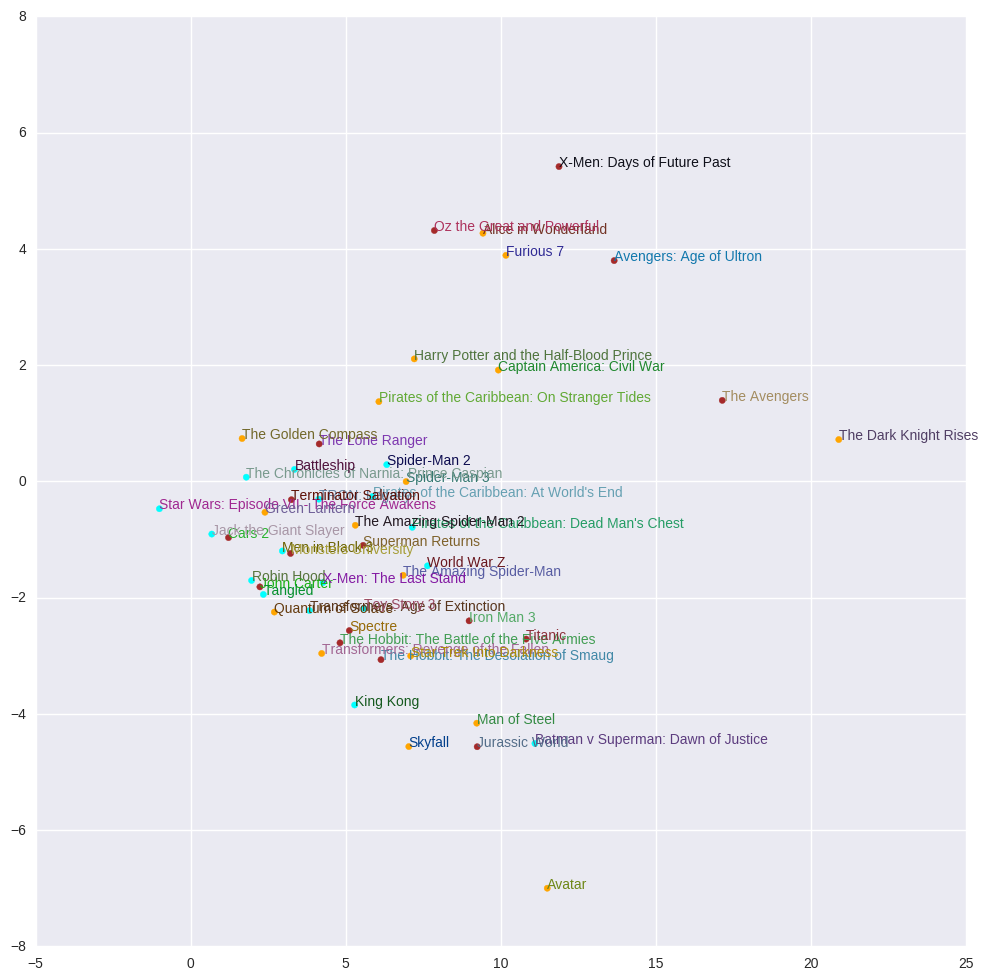

In [39]:
plt.figure(figsize=(12,12))
plt.scatter(df['pca_one'][:50], df['pca_two'][:50], color=['orange', 'cyan', 'brown'], cmap='viridis')

for m, p1, p2 in zip(df['movie_title'][:50], df['pca_one'][:50], df['pca_two'][:50]):
    plt.text(p1, p2, s=m, color=np.random.rand(3)*0.7)

# KMeans

In [40]:
km = KMeans(n_clusters = 5)

In [41]:
#P_fit = km.fit(df[['gross','imdb_score','num_critic_for_reviews','director_facebook_likes','actor_1_facebook_likes','movie_facebook_likes','actor_3_facebook_likes','actor_2_facebook_likes']])
P_fit = km.fit(df[['gross','imdb_score']])
P_fit.labels_
# colormap = {0:'red',1:'green',2:'blue'}
# lc =  [colormap[c] for c in colormap]
# plt.scatter(df['pca_one'],df['pca_two'],c = lc)


array([4, 4, 1, ..., 0, 0, 0], dtype=int32)

In [42]:
df['cluster'] = P_fit.labels_

In [43]:
np.unique(P_fit.labels_)

array([0, 1, 2, 3, 4], dtype=int32)

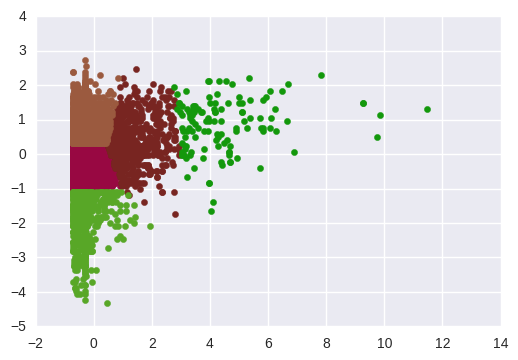

In [44]:
for i in np.unique(P_fit.labels_):
    temp = df[df['cluster'] == i]
    plt.scatter(temp['gross'], temp['imdb_score'], color=np.random.rand(3)*0.7)

# DBSCAN

In [45]:
cols3 = ['director_facebook_likes','imdb_score']

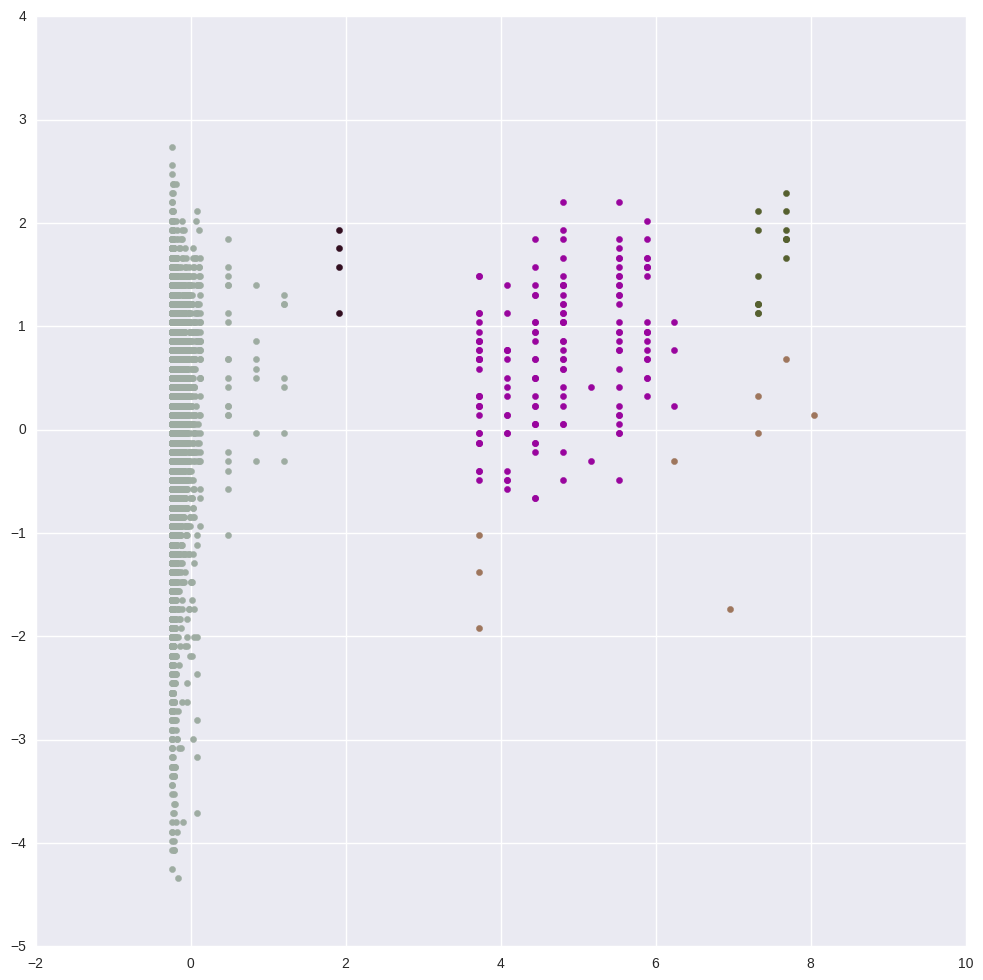

In [46]:
#The min_pts are taken as >= D+1 and the eps value is estimated from the elbow in k-distance graph
db = DBSCAN(eps = .5, min_samples=3).fit(df[cols3])
len(db.core_sample_indices_)
df['cluster'] = db.labels_
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(np.unique(db.labels_)))]
plt.figure(figsize= (12,12))
for i in np.unique(db.labels_):
    temp = df[df['cluster'] == i]
    plt.scatter(temp['director_facebook_likes'], temp['imdb_score'], color = np.random.rand(3)*0.7)

# Random Forest

In [47]:
features = col

In [48]:
features.remove('imdb_score')

In [49]:
features

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'aspect_ratio',
 'movie_facebook_likes']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Success'], test_size=0.2)

In [51]:
# rf = RandomForestClassifier(random_state=1, n_estimators=250, min_samples_split=8, min_samples_leaf=4)

# rf = GradientBoostingClassifier(random_state=0, n_estimators=250, min_samples_split=8, 
#                                min_samples_leaf=4, learning_rate=0.1)

rf = xgb.XGBClassifier(n_estimators=250)

rf.fit(X_train, y_train)

predictions = rf.predict(X_test)

In [52]:
predictions = predictions.astype(int)

In [53]:
np.unique(predictions)

array([0, 1, 2, 3, 4])

In [54]:
accuracy_score(y_test, predictions)

0.53914767096134786

In [55]:
features.insert(0, 'imdb_score')

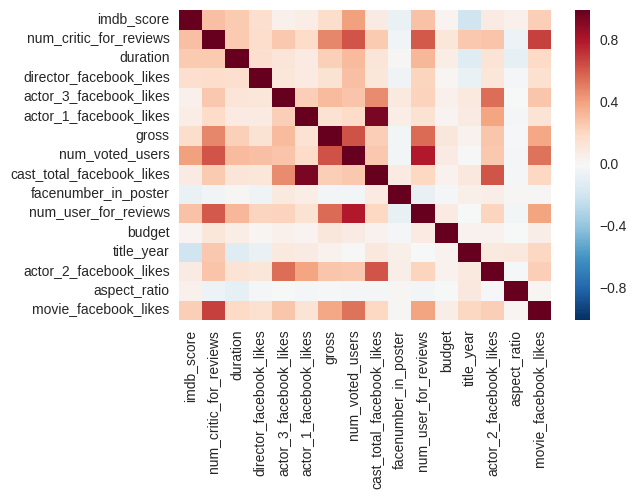

In [56]:
sns.heatmap(df[features].corr())